# Lab 2: Windowing Analysis
## Variant 14 - Signal Processing Laboratory

**Student:** [Your Name]  
**Date:** [Current Date]  
**Variant:** 14

### Parameters:
- f₁ = 600 Hz
- f₂ = 600.25 Hz  
- f₃ = 599.75 Hz
- |x[k]|ₘₐₓ = 4
- fs = 500 Hz
- N = 2000

### Important Note:
All frequencies exceed the Nyquist frequency (fs/2 = 250 Hz), which will demonstrate **aliasing effects**!

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

# Set up matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Lab 2: Windowing Analysis")
print("Variant 14 Parameters:")
print("f1 = 600 Hz")
print("f2 = 600.25 Hz") 
print("f3 = 599.75 Hz")
print("|x[k]|max = 4")
print("fs = 500 Hz")
print("N = 2000")
print("\nNote: All frequencies are above Nyquist frequency (fs/2 = 250 Hz)")
print("This will demonstrate aliasing effects!\n")

Lab 2: Windowing Analysis
Variant 14 Parameters:
f1 = 600 Hz
f2 = 600.25 Hz
f3 = 599.75 Hz
|x[k]|max = 4
fs = 500 Hz
N = 2000

Note: All frequencies are above Nyquist frequency (fs/2 = 250 Hz)
This will demonstrate aliasing effects!



## 1. Signal Parameters and Aliasing Analysis

In [3]:
# Signal Parameters for Variant 14
f1 = 600      # Hz
f2 = 600.25   # Hz  
f3 = 599.75   # Hz
amplitude = 4 # |x[k]|max
fs = 500      # Hz
N = 2000      # samples

# Calculate aliased frequencies (what we actually observe)
f1_alias = f1 % fs
f2_alias = f2 % fs
f3_alias = f3 % fs

# Adjust for frequencies > fs/2 (they alias to fs - f)
if f1_alias > fs/2:
    f1_alias = fs - f1_alias
if f2_alias > fs/2:
    f2_alias = fs - f2_alias  
if f3_alias > fs/2:
    f3_alias = fs - f3_alias

print(f"Original frequencies: f1={f1}, f2={f2}, f3={f3} Hz")
print(f"Aliased frequencies: f1_alias={f1_alias}, f2_alias={f2_alias}, f3_alias={f3_alias} Hz")
print(f"Sampling frequency: fs={fs} Hz")
print(f"Nyquist frequency: {fs/2} Hz\n")

Original frequencies: f1=600, f2=600.25, f3=599.75 Hz
Aliased frequencies: f1_alias=100, f2_alias=100.25, f3_alias=99.75 Hz
Sampling frequency: fs=500 Hz
Nyquist frequency: 250.0 Hz



## 2. Generate Signals

In [4]:
# Generate time vector and signals
k = np.arange(N)
x1 = amplitude * np.sin(2*np.pi * f1 / fs * k)
x2 = amplitude * np.sin(2*np.pi * f2 / fs * k) 
x3 = amplitude * np.sin(2*np.pi * f3 / fs * k)

# Combined signal
x_combined = x1 + x2 + x3

print(f"Generated signals:")
print(f"x1: {f1} Hz sine wave")
print(f"x2: {f2} Hz sine wave")
print(f"x3: {f3} Hz sine wave")
print(f"x_combined: Sum of all three signals")

Generated signals:
x1: 600 Hz sine wave
x2: 600.25 Hz sine wave
x3: 599.75 Hz sine wave
x_combined: Sum of all three signals


## 3. Generate Window Functions

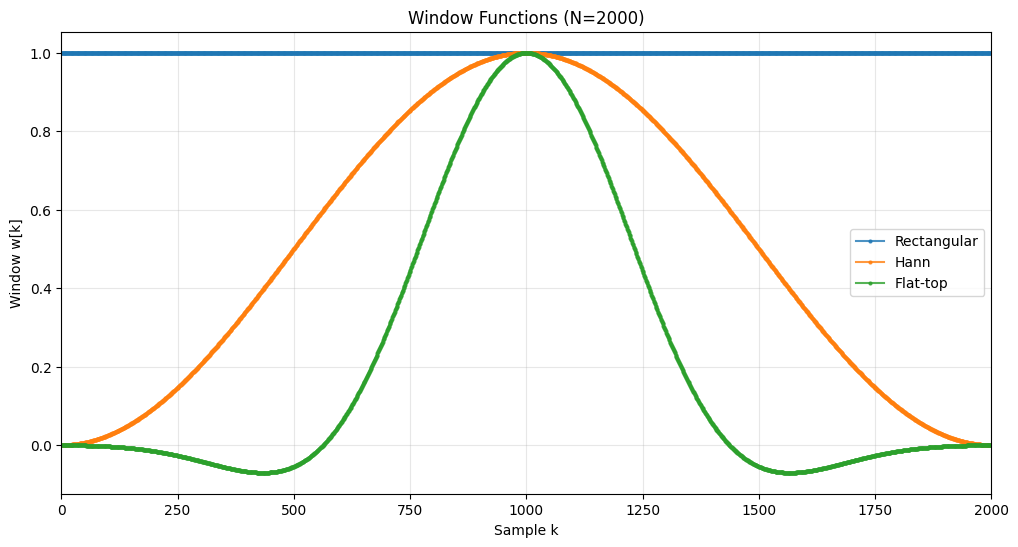

In [5]:
# Generate window functions
wrect = np.ones(N)                    # Rectangular window
whann = hann(N, sym=False)           # Hann window  
wflattop = flattop(N, sym=False)     # Flat-top window

# Plot window functions
plt.figure(figsize=(12, 6))
plt.plot(wrect, 'C0o-', ms=2, label='Rectangular', alpha=0.8)
plt.plot(whann, 'C1o-', ms=2, label='Hann', alpha=0.8)
plt.plot(wflattop, 'C2o-', ms=2, label='Flat-top', alpha=0.8)
plt.xlabel('Sample k')
plt.ylabel('Window w[k]')
plt.title('Window Functions (N=2000)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, N)
plt.show()

## 4. Apply Windows and Compute FFT

In [6]:
# Apply windows to combined signal
x_rect = x_combined * wrect
x_hann = x_combined * whann  
x_flattop = x_combined * wflattop

# Compute FFT spectra
X_rect = fft(x_rect)
X_hann = fft(x_hann)
X_flattop = fft(x_flattop)

print("Applied windows to combined signal and computed FFT spectra")

Applied windows to combined signal and computed FFT spectra


## 5. Normalization Function for DFT

In [7]:
def fft2db(X):
    """Convert FFT to dB with proper normalization for sine signals"""
    N = X.size
    Xtmp = 2/N * X  # Independent of N, normalized for sine amplitudes
    Xtmp[0] *= 1/2  # DC bin exists only once, cancel *2 from above
    if N % 2 == 0:  # fs/2 bin exists only once
        Xtmp[N//2] = Xtmp[N//2] / 2
    return 20*np.log10(np.abs(Xtmp))  # in dB

# Setup frequency vector
df = fs/N
f = np.arange(N) * df

print(f"Frequency resolution: {df:.3f} Hz")
print(f"Frequency vector created from 0 to {fs} Hz")

Frequency resolution: 0.250 Hz
Frequency vector created from 0 to 500 Hz


## 6. Plot Normalized DFT Spectra

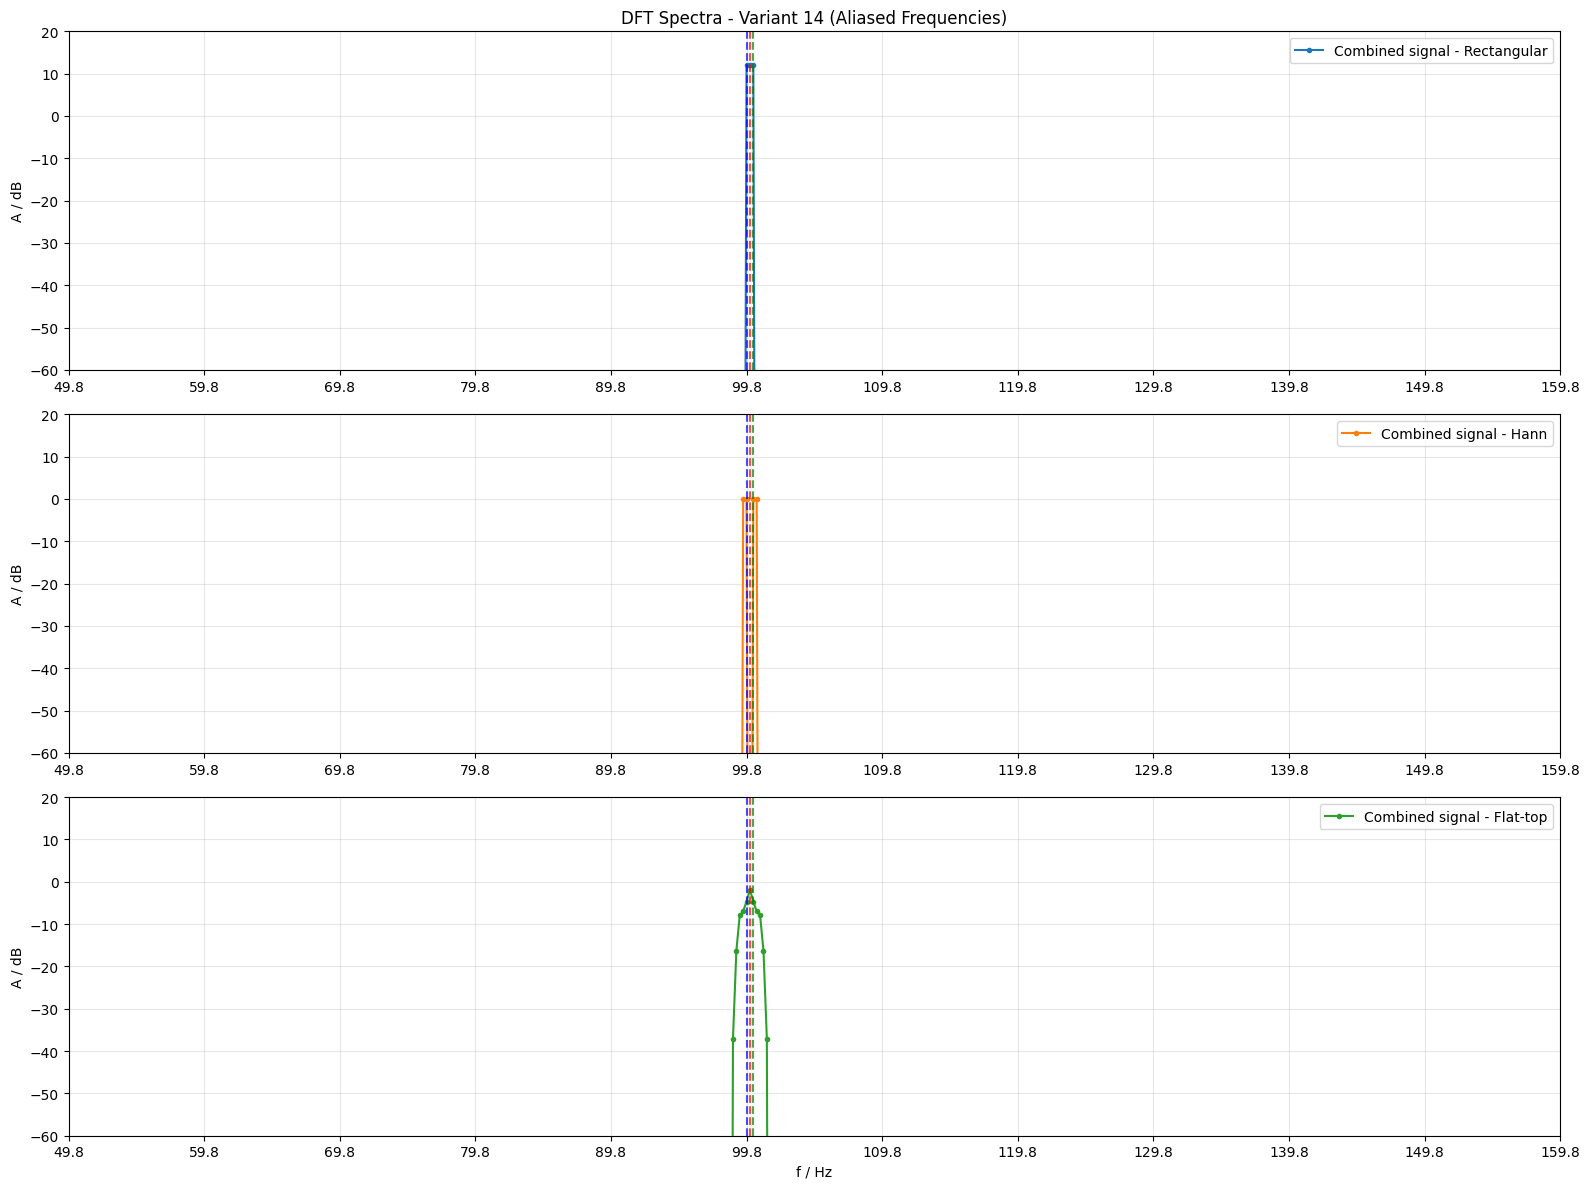

In [8]:
plt.figure(figsize=(16, 12))

# Determine frequency range for plotting (focus on aliased frequencies)
f_min = max(0, min(f1_alias, f2_alias, f3_alias) - 50)
f_max = min(fs/2, max(f1_alias, f2_alias, f3_alias) + 50)

# Rectangular window
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X_rect), 'C0o-', ms=3, label='Combined signal - Rectangular')
plt.xlim(f_min, f_max)
plt.ylim(-60, 20)
plt.xticks(np.arange(f_min, f_max+10, 10))
plt.yticks(np.arange(-60, 30, 10))
plt.ylabel('A / dB')
plt.title('DFT Spectra - Variant 14 (Aliased Frequencies)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add vertical lines at expected aliased frequencies
plt.axvline(f1_alias, color='red', linestyle='--', alpha=0.7, label=f'f1_alias = {f1_alias:.2f} Hz')
plt.axvline(f2_alias, color='green', linestyle='--', alpha=0.7, label=f'f2_alias = {f2_alias:.2f} Hz')
plt.axvline(f3_alias, color='blue', linestyle='--', alpha=0.7, label=f'f3_alias = {f3_alias:.2f} Hz')

# Hann window
plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X_hann), 'C1o-', ms=3, label='Combined signal - Hann')
plt.xlim(f_min, f_max)
plt.ylim(-60, 20)
plt.xticks(np.arange(f_min, f_max+10, 10))
plt.yticks(np.arange(-60, 30, 10))
plt.ylabel('A / dB')
plt.legend()
plt.grid(True, alpha=0.3)

plt.axvline(f1_alias, color='red', linestyle='--', alpha=0.7)
plt.axvline(f2_alias, color='green', linestyle='--', alpha=0.7)
plt.axvline(f3_alias, color='blue', linestyle='--', alpha=0.7)

# Flat-top window
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X_flattop), 'C2o-', ms=3, label='Combined signal - Flat-top')
plt.xlim(f_min, f_max)
plt.ylim(-60, 20)
plt.xticks(np.arange(f_min, f_max+10, 10))
plt.yticks(np.arange(-60, 30, 10))
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.legend()
plt.grid(True, alpha=0.3)

plt.axvline(f1_alias, color='red', linestyle='--', alpha=0.7)
plt.axvline(f2_alias, color='green', linestyle='--', alpha=0.7)
plt.axvline(f3_alias, color='blue', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 7. Window DTFT Analysis

In [9]:
def winDTFTdB(w):
    """Compute window DTFT with zero-padding for high resolution"""
    N = w.size
    Nz = 100*N  # Zero-padding length for high resolution
    W = np.zeros(Nz)
    W[0:N] = w
    W = np.abs(fftshift(fft(W)))  # FFT, shift and magnitude
    W /= np.max(W)  # Normalize to maximum (mainlobe)
    W = 20*np.log10(W)  # Convert to dB
    
    # Get appropriate digital frequencies
    Omega = 2*np.pi/Nz * np.arange(Nz) - np.pi  # Also shifted
    return Omega, W

# Compute window DTFT spectra
Omega_rect, W_rect = winDTFTdB(wrect)
Omega_hann, W_hann = winDTFTdB(whann)  
Omega_flattop, W_flattop = winDTFTdB(wflattop)

print("Computed window DTFT spectra with high resolution using zero-padding")

Computed window DTFT spectra with high resolution using zero-padding


C:\Users\grzeg\AppData\Local\Temp\ipykernel_19372\3775672200.py:9: RuntimeWarning: divide by zero encountered in log10
  W = 20*np.log10(W)  # Convert to dB


## 8. Plot Window DTFT Spectra

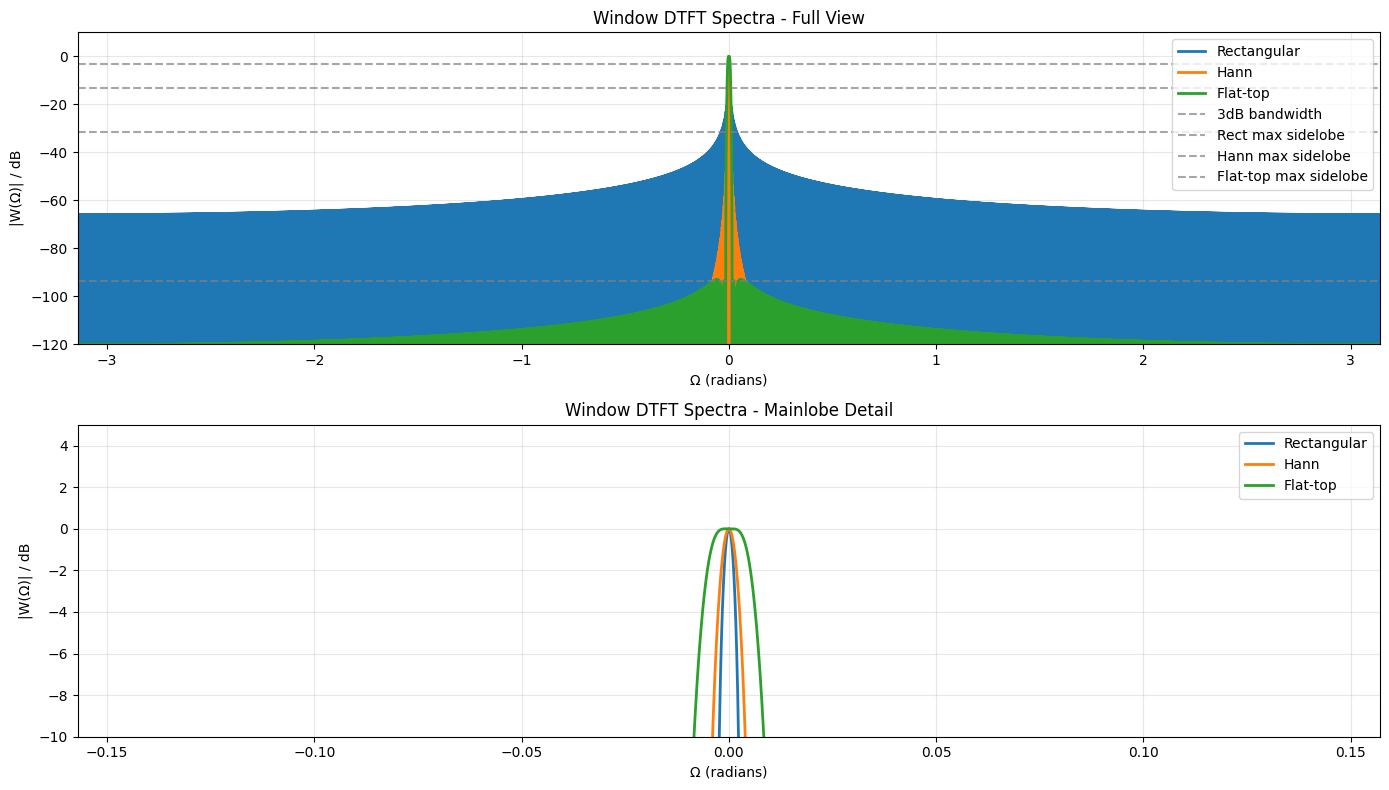

In [10]:
plt.figure(figsize=(14, 8))

# Full spectrum view
plt.subplot(2, 1, 1)
plt.plot(Omega_rect, W_rect, label='Rectangular', linewidth=2)
plt.plot(Omega_hann, W_hann, label='Hann', linewidth=2)
plt.plot(Omega_flattop, W_flattop, label='Flat-top', linewidth=2)

# Add reference lines for sidelobe levels
plt.axhline(-3.01, color='gray', linestyle='--', alpha=0.7, label='3dB bandwidth')
plt.axhline(-13.3, color='gray', linestyle='--', alpha=0.7, label='Rect max sidelobe')
plt.axhline(-31.5, color='gray', linestyle='--', alpha=0.7, label='Hann max sidelobe')
plt.axhline(-93.6, color='gray', linestyle='--', alpha=0.7, label='Flat-top max sidelobe')

plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlabel('Ω (radians)')
plt.ylabel('|W(Ω)| / dB')
plt.title('Window DTFT Spectra - Full View')
plt.legend()
plt.grid(True, alpha=0.3)

# Mainlobe zoom
plt.subplot(2, 1, 2)
plt.plot(Omega_rect, W_rect, label='Rectangular', linewidth=2)
plt.plot(Omega_hann, W_hann, label='Hann', linewidth=2)
plt.plot(Omega_flattop, W_flattop, label='Flat-top', linewidth=2)

plt.xlim(-np.pi/20, np.pi/20)  # Zoom into mainlobe
plt.ylim(-10, 5)
plt.xlabel('Ω (radians)')
plt.ylabel('|W(Ω)| / dB')
plt.title('Window DTFT Spectra - Mainlobe Detail')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Analysis of Individual Signals

Individual Signal Analysis:


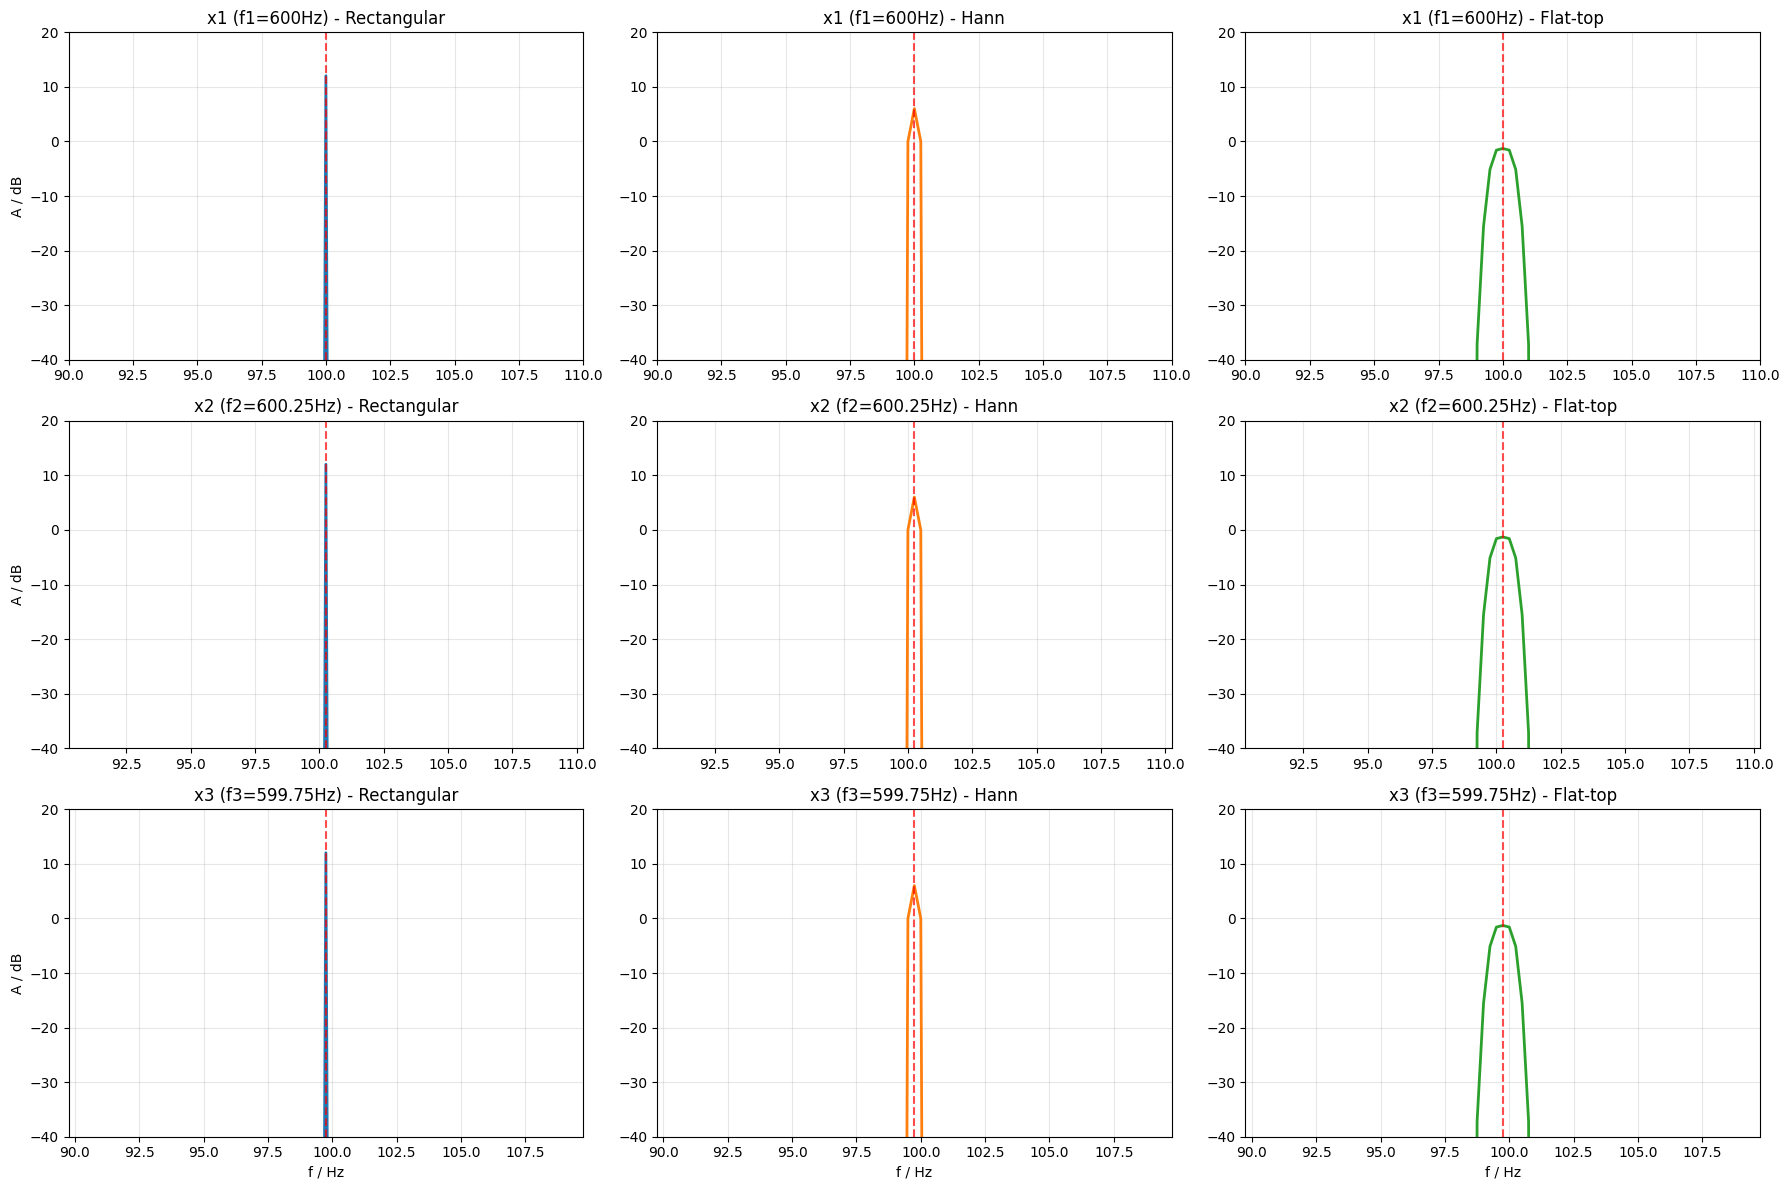

In [11]:
print("Individual Signal Analysis:")
print("="*50)

# Analyze each signal separately with different windows
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

signals = [x1, x2, x3]
signal_names = ['x1 (f1=600Hz)', 'x2 (f2=600.25Hz)', 'x3 (f3=599.75Hz)']
alias_freqs = [f1_alias, f2_alias, f3_alias]

for i, (signal, name, f_alias) in enumerate(zip(signals, signal_names, alias_freqs)):
    # Apply windows
    s_rect = signal * wrect
    s_hann = signal * whann
    s_flattop = signal * wflattop
    
    # Compute FFT
    S_rect = fft(s_rect)
    S_hann = fft(s_hann)
    S_flattop = fft(s_flattop)
    
    # Plot frequency range around aliased frequency
    f_center = f_alias
    f_range = 10  # Hz range around center
    
    # Rectangular
    axes[i, 0].plot(f, fft2db(S_rect), 'C0-', linewidth=2)
    axes[i, 0].axvline(f_alias, color='red', linestyle='--', alpha=0.7)
    axes[i, 0].set_xlim(f_center-f_range, f_center+f_range)
    axes[i, 0].set_ylim(-40, 20)
    axes[i, 0].set_title(f'{name} - Rectangular')
    axes[i, 0].grid(True, alpha=0.3)
    if i == 2:
        axes[i, 0].set_xlabel('f / Hz')
    axes[i, 0].set_ylabel('A / dB')
    
    # Hann
    axes[i, 1].plot(f, fft2db(S_hann), 'C1-', linewidth=2)
    axes[i, 1].axvline(f_alias, color='red', linestyle='--', alpha=0.7)
    axes[i, 1].set_xlim(f_center-f_range, f_center+f_range)
    axes[i, 1].set_ylim(-40, 20)
    axes[i, 1].set_title(f'{name} - Hann')
    axes[i, 1].grid(True, alpha=0.3)
    if i == 2:
        axes[i, 1].set_xlabel('f / Hz')
    
    # Flat-top
    axes[i, 2].plot(f, fft2db(S_flattop), 'C2-', linewidth=2)
    axes[i, 2].axvline(f_alias, color='red', linestyle='--', alpha=0.7)
    axes[i, 2].set_xlim(f_center-f_range, f_center+f_range)
    axes[i, 2].set_ylim(-40, 20)
    axes[i, 2].set_title(f'{name} - Flat-top')
    axes[i, 2].grid(True, alpha=0.3)
    if i == 2:
        axes[i, 2].set_xlabel('f / Hz')

plt.tight_layout()
plt.show()

## 10. Spectral Leakage Analysis

In [12]:
print("\nSpectral Leakage Analysis:")
print("="*40)

# Calculate exact frequency bins
f1_bin = f1_alias * N / fs
f2_bin = f2_alias * N / fs  
f3_bin = f3_alias * N / fs

print(f"Expected frequency bins (for aliased frequencies):")
print(f"f1_alias = {f1_alias:.3f} Hz → bin {f1_bin:.2f}")
print(f"f2_alias = {f2_alias:.3f} Hz → bin {f2_bin:.2f}")
print(f"f3_alias = {f3_alias:.3f} Hz → bin {f3_bin:.2f}")

# Check if frequencies align with bins
print(f"\nFrequency-bin alignment:")
print(f"f1: {'Good' if abs(f1_bin - round(f1_bin)) < 0.01 else 'Poor'} alignment (error: {abs(f1_bin - round(f1_bin)):.3f})")
print(f"f2: {'Good' if abs(f2_bin - round(f2_bin)) < 0.01 else 'Poor'} alignment (error: {abs(f2_bin - round(f2_bin)):.3f})")
print(f"f3: {'Good' if abs(f3_bin - round(f3_bin)) < 0.01 else 'Poor'} alignment (error: {abs(f3_bin - round(f3_bin)):.3f})")


Spectral Leakage Analysis:
Expected frequency bins (for aliased frequencies):
f1_alias = 100.000 Hz → bin 400.00
f2_alias = 100.250 Hz → bin 401.00
f3_alias = 99.750 Hz → bin 399.00

Frequency-bin alignment:
f1: Good alignment (error: 0.000)
f2: Good alignment (error: 0.000)
f3: Good alignment (error: 0.000)


## 11. Window Performance Comparison

In [13]:
print(f"\nWindow Performance Summary:")
print("="*45)

# Find peak values for each window
rect_peaks = []
hann_peaks = []
flattop_peaks = []

for signal, f_alias in zip(signals, alias_freqs):
    # Find the bin closest to aliased frequency
    target_bin = int(round(f_alias * N / fs))
    
    # Apply windows and get FFT
    S_rect = fft2db(fft(signal * wrect))
    S_hann = fft2db(fft(signal * whann))
    S_flattop = fft2db(fft(signal * wflattop))
    
    # Find peak in neighborhood
    search_range = 5  # bins
    start_bin = max(0, target_bin - search_range)
    end_bin = min(N//2, target_bin + search_range)
    
    rect_peak = np.max(S_rect[start_bin:end_bin])
    hann_peak = np.max(S_hann[start_bin:end_bin])
    flattop_peak = np.max(S_flattop[start_bin:end_bin])
    
    rect_peaks.append(rect_peak)
    hann_peaks.append(hann_peak)
    flattop_peaks.append(flattop_peak)

print(f"Peak amplitudes (dB):")
print(f"Signal    Rectangular    Hann       Flat-top")
print(f"x1        {rect_peaks[0]:8.1f}    {hann_peaks[0]:8.1f}   {flattop_peaks[0]:8.1f}")
print(f"x2        {rect_peaks[1]:8.1f}    {hann_peaks[1]:8.1f}   {flattop_peaks[1]:8.1f}")
print(f"x3        {rect_peaks[2]:8.1f}    {hann_peaks[2]:8.1f}   {flattop_peaks[2]:8.1f}")

print(f"\nExpected amplitude: {20*np.log10(amplitude):.1f} dB")


Window Performance Summary:
Peak amplitudes (dB):
Signal    Rectangular    Hann       Flat-top
x1            12.0         6.0       -1.3
x2            12.0         6.0       -1.3
x3            12.0         6.0       -1.3

Expected amplitude: 12.0 dB
